In [1]:
from utilities import plot_date_distribution, set_catch_ratio
import pandas as pd

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_VMS_COMPLETE.csv', sep=';')
na_dates = test['Date'].dropna()

print(f'Dates with NA: {test.shape} - {na_dates.shape}')

test.describe()

/tmp/ipykernel_372056/893028065.py:1: DtypeWarning: Columns (7,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/TEST_MAC_ERS_VMS_COMPLETE.csv', sep=';')


Dates with NA: (704369, 18) - (704369,)


/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,CatchLat,CatchLon,Startposisjon bredde,Startposisjon lengde,Stopposisjon bredde,Stopposisjon lengde,Rundvekt,distance_km,elapsed_time_hours,speed
count,704369.000000,704369.000000,45953.000000,45953.000000,45953.000000,45953.000000,4.595300e+04,45953.000000,45953.000000,4.582300e+04
mean,61.032218,2.558305,61.746286,1.601043,61.769459,1.638692,1.183061e+05,10.380290,2.984227,inf
std,1.865695,1.512913,2.101776,1.978756,2.134836,1.970236,1.458861e+05,59.081767,2.702181,NaN
min,57.686300,-3.133000,54.751000,-10.000000,0.422000,-5.000000,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,59.579900,1.892700,59.758000,-0.033000,59.767000,-0.030000,1.200000e+04,0.956192,1.466667,5.932841e-01
50%,60.266349,3.097536,62.100000,1.576000,62.125000,1.596000,6.500000e+04,2.131672,2.100000,1.187930e+00
75%,62.766682,3.340100,63.733000,2.874000,63.750000,2.896000,1.650000e+05,8.000539,3.366667,2.911351e+00
max,68.242700,7.500000,68.233000,85.748000,89.133000,85.715000,3.200000e+06,6876.631761,43.800000,inf


Number of unique catch dates: 1170
Number of unique non-catch dates: 0


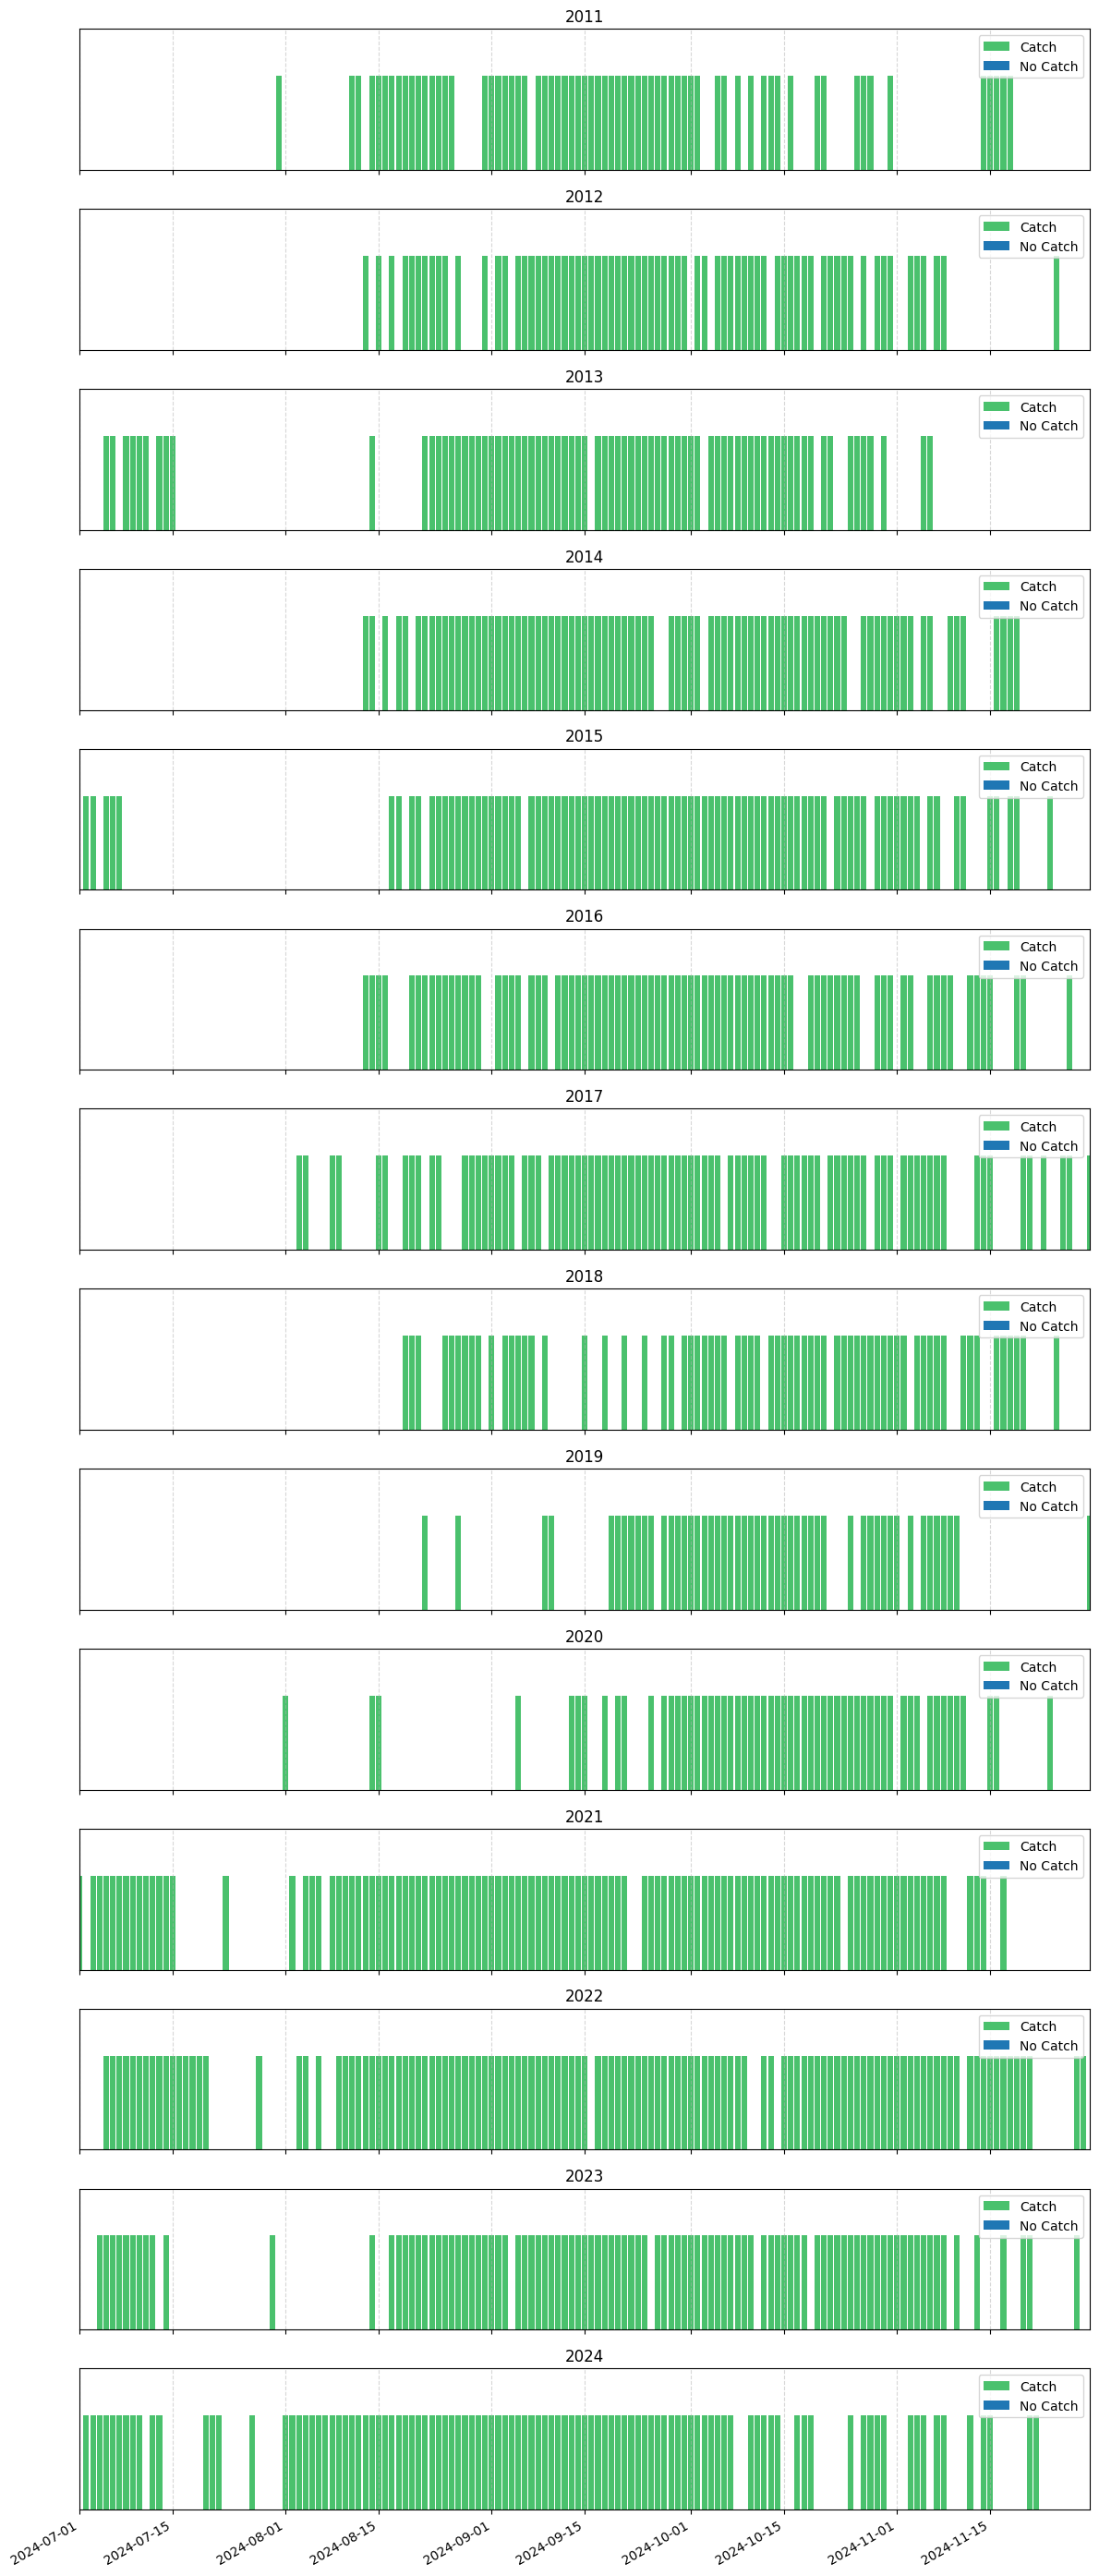

In [3]:
# df = pd.read_csv('/home/anna/msc_oppgave/fish-forecast/Data/test128x128_55p_11to24/dates_of_interest.csv', sep=';')
df = test

start_date = '07-01'
end_date = '11-30'

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Catch'] = df['Catch'].astype(bool)
non_catch_dates = df[df['Catch'] == False]['Date'].unique()
df = df[df['Rundvekt'] > 0.0]
# df = df[df['Date'].dt.year > 2018]

catch_dates = df['Date'].unique()
print(f"Number of unique catch dates: {len(catch_dates)}")
catch_dates = set(catch_dates)
empty_set = set()
# plot_date_distribution(catch_dates, empty_set, start_date=start_date, end_date=end_date)
print(f"Number of unique non-catch dates: {len(non_catch_dates)}")
non_catch_dates = set(non_catch_dates)
plot_date_distribution(catch_dates, non_catch_dates, start_date=start_date, end_date=end_date)

In [4]:
#loop over all years in the df
df_50p = pd.DataFrame()
df_no_catch_dates = pd.DataFrame()
# start_date = '06-01'
# end_date = '11-30'
catch_params = {}

for year in df['Date'].dt.year.unique():
	year_df = df[df['Date'].dt.year == year]
	catch_params['time'] = [f'{year}-{start_date}', f'{year}-{end_date}']
	catch_ratio = set_catch_ratio(catch_params, year_df, 0.5, 'continuous')

	# find all dates in the year_df that are between start_date and end_date
	curr_df = pd.DataFrame({'Date': pd.date_range(start=f'{year}-{start_date}', end=f'{year}-{end_date}')})
	curr_df['Catch'] = False

	# remove dates in curr_df that are in year_df['Date']
	curr_df = curr_df[~curr_df['Date'].isin(year_df['Date'])]

	df_no_catch_dates = pd.concat([df_no_catch_dates, curr_df], ignore_index=True)
	# Add the current year's catch ratio df to the df_50p
	df_50p = pd.concat([df_50p, catch_ratio], ignore_index=True)

df['Catch'] = True

# add df and df_no_catch_dates
df_all_dates = pd.concat([df, df_no_catch_dates], ignore_index=True)

# add Catch True to df_50p for all dates that are true in df and false otherwise
df_50p['Catch'] = df_50p['Date'].isin(df['Date']).astype(bool)

# add new catch date set for all df_50p['Catch'] == True
catch_dates_50p = set(df_50p[df_50p['Catch']]['Date'].unique())

# add new no catch date set for all df_50p['Catch'] == False
no_catch_dates_50p = set(df_50p[~df_50p['Catch']]['Date'].unique())

/home/anna/msc_oppgave/fish-forecast/utilities.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
/home/anna/msc_oppgave/fish-forecast/utilities.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])
18:52:25.748 | INFO     | /home/anna/msc_oppgave/fish-forecast/utilities.py:135 - Period used (%): 67/153 = 43.79% -> Days w/o: 86
18:52:25.749 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/utilities.py:143 - Want to add 67 da

In [5]:
# sort the dates
catch_dates_50p = sorted(catch_dates_50p)
no_catch_dates_50p = sorted(no_catch_dates_50p)
print(f'days: {len(catch_dates_50p) + len(no_catch_dates_50p)}, possible days: {183*14}')
print(f'{183*14 - len(catch_dates_50p)} possible days without catch, {len(catch_dates_50p)} days with catch')
potential_ratio = len(catch_dates_50p) / (183 * 14)
print(f'Potential catch ratio: {potential_ratio:.2%}')

days: 2005, possible days: 2562
1392 possible days without catch, 1170 days with catch
Potential catch ratio: 45.67%


Resulting catch ratio: 0.5835411471321695
Number of catch dates: 1170
Number of no catch dates: 835


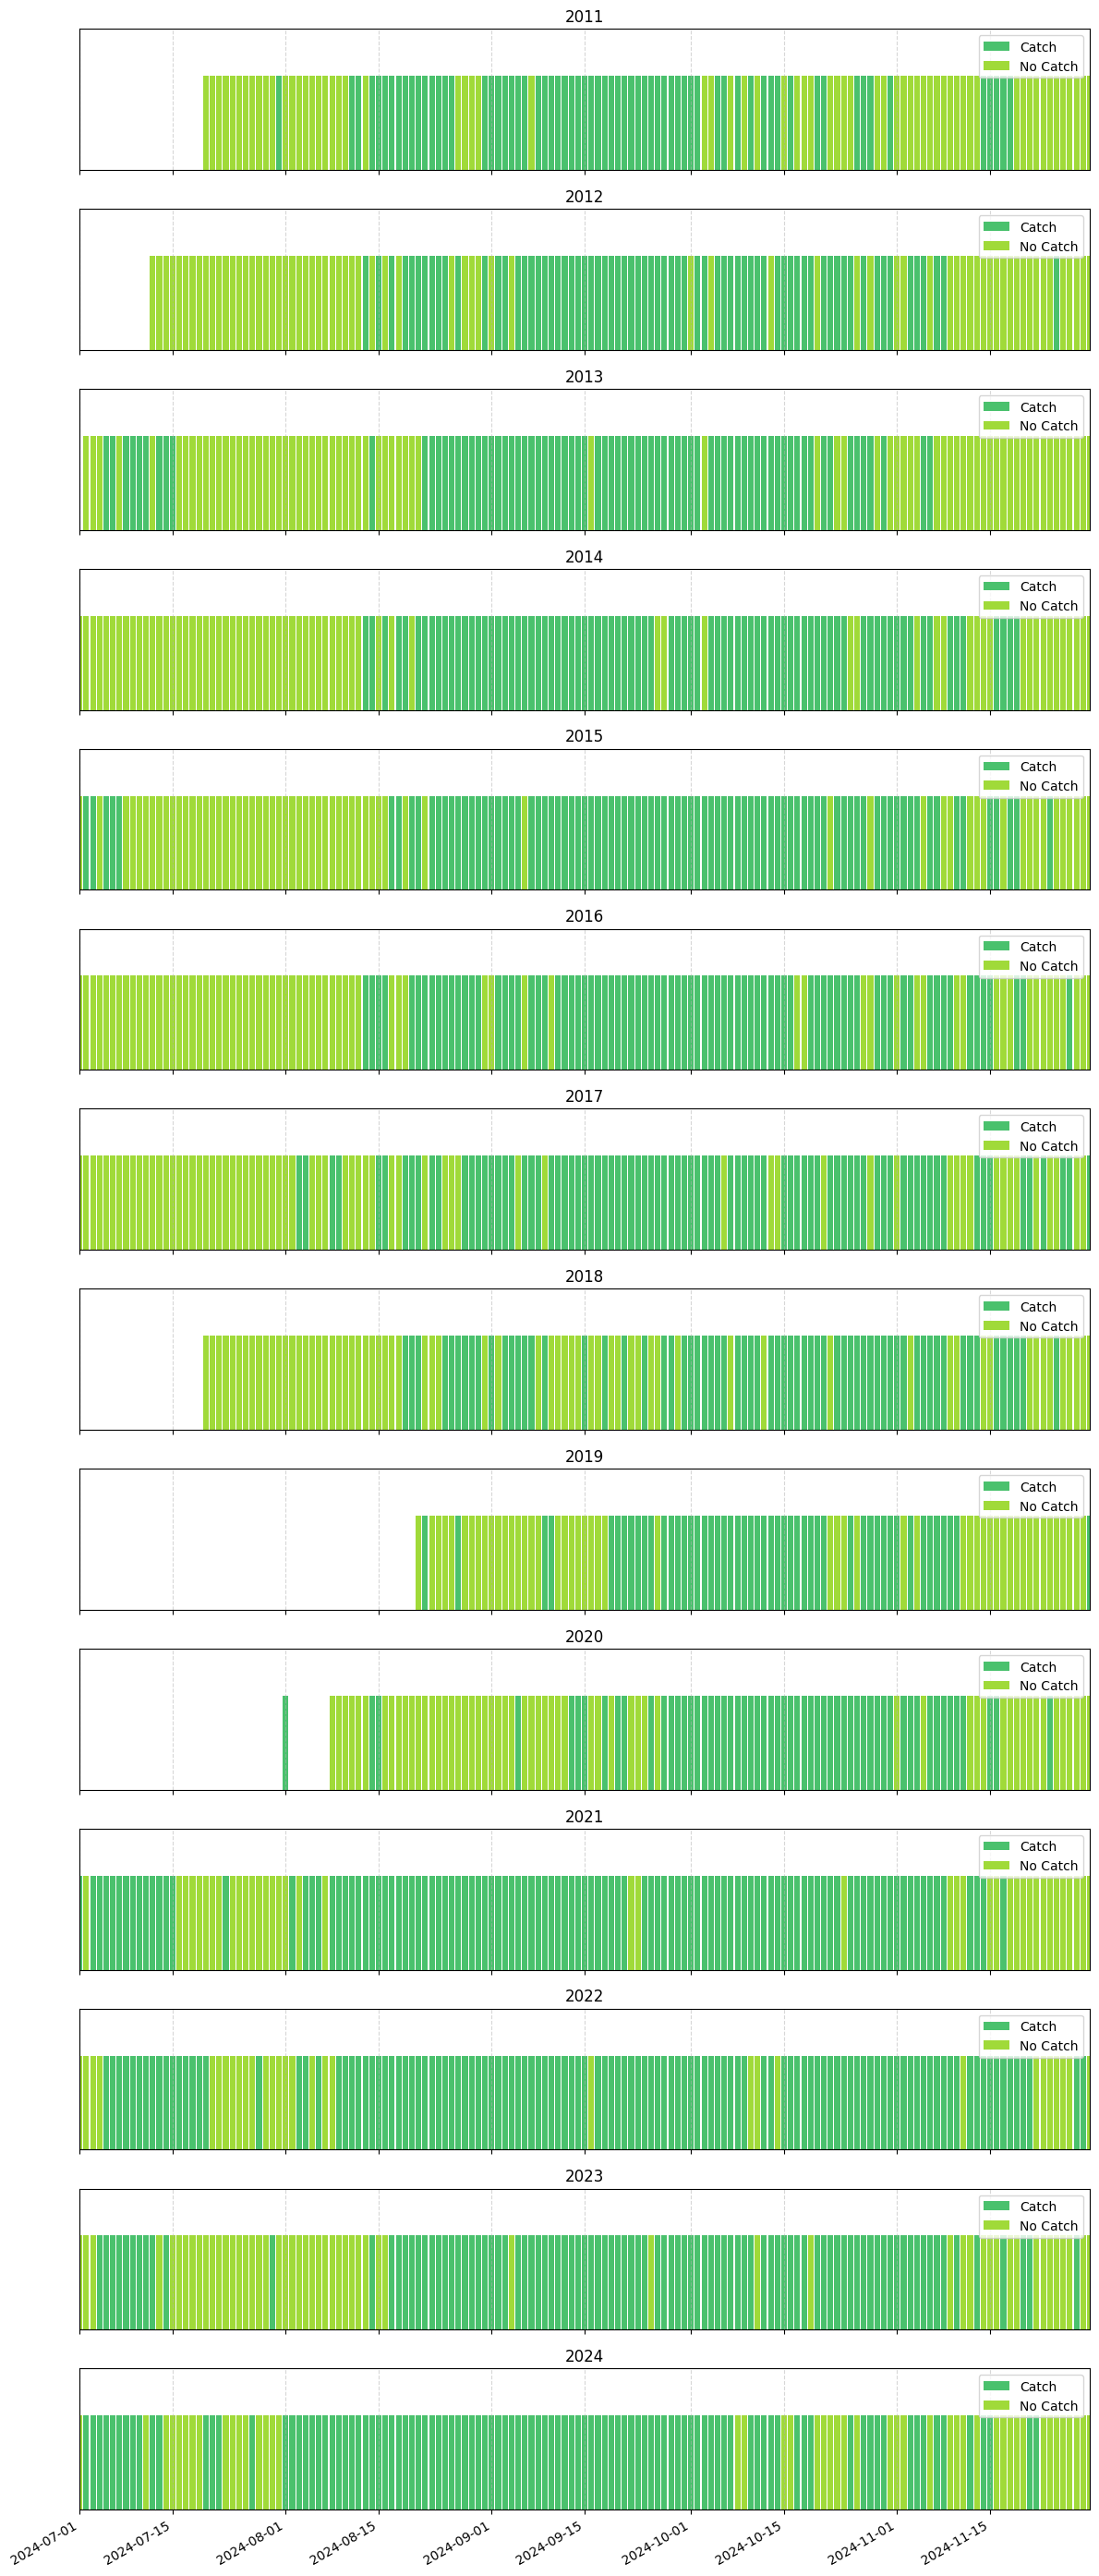

In [6]:
print(f'Resulting catch ratio: {len(catch_dates_50p) / (len(no_catch_dates_50p) + len(catch_dates_50p))}')
print(f'Number of catch dates: {len(catch_dates_50p)}')
print(f'Number of no catch dates: {len(no_catch_dates_50p)}')
# plot the date distribution for the 50% catch ratio
plot_date_distribution(catch_dates_50p, no_catch_dates_50p, start_date=start_date, end_date=end_date)

Resulting catch ratio: 0.5459636024265049
Number of catch dates: 1170
Number of no catch dates: 973


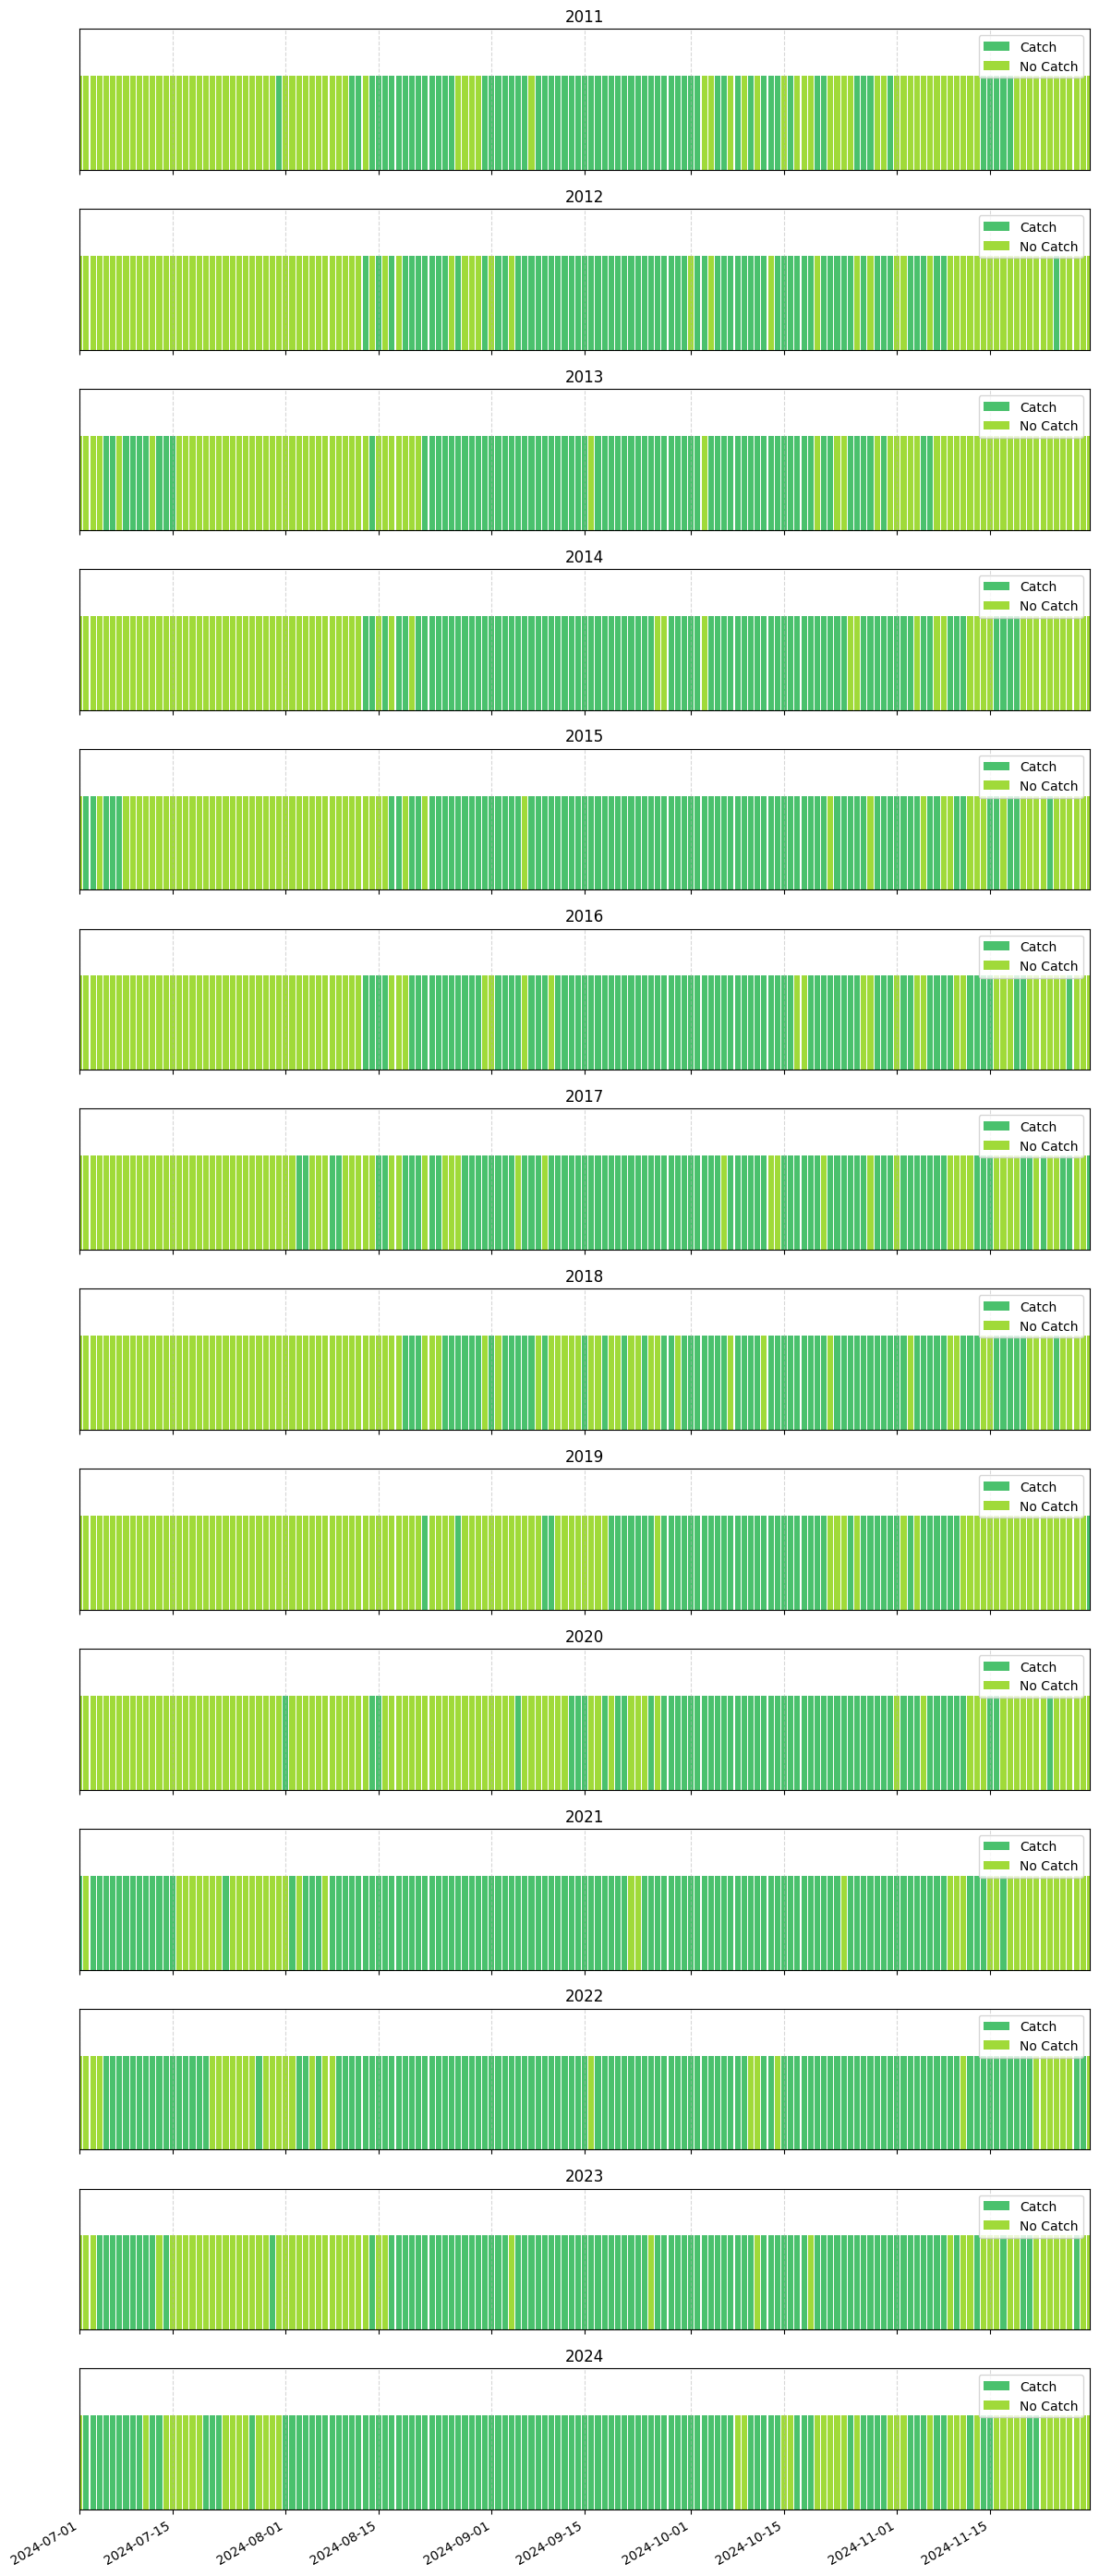

In [7]:
# Reorder the df_all_dates by date
df_all_dates = df_all_dates.sort_values(by='Date').reset_index(drop=True)

# create two sets for all dates catch== True and catch==False
catch_dates_all = set(df_all_dates[df_all_dates['Catch']]['Date'].unique())
no_catch_dates_all = set(df_all_dates[~df_all_dates['Catch']]['Date'].unique())


print(f'Resulting catch ratio: {len(catch_dates_all) / (len(no_catch_dates_all) + len(catch_dates_all))}')
print(f'Number of catch dates: {len(catch_dates_all)}')
print(f'Number of no catch dates: {len(no_catch_dates_all)}')
# plot the date distribution for the 50% catch ratio
plot_date_distribution(catch_dates_all, no_catch_dates_all, start_date=start_date, end_date=end_date)

In [10]:
# save the df_all_dates to a csv file
df_all_dates.to_csv('catch_ERS_VMS_FINAL_DATASET.csv', sep=';', index=False)
df_all_dates[df_all_dates['Catch']== True].head(10)


,Starttidspunkt,Fartøyidentifikasjon,Source,CatchLat,CatchLon,Startposisjon bredde,Startposisjon lengde,Stopptidspunkt,Stopposisjon bredde,Stopposisjon lengde,Rundvekt,Method,Location,Date,distance_km,elapsed_time_hours,speed,Catch
30,2011-07-31 06:41:00,B.M. DRIVENES - LM7682 - H 0223AV,ERS,60.212,3.254,60.094,3.298,2011-07-31 20:38:00,60.212,3.254,1500.0,stop,"(60.212, 3.254)",2011-07-31,13.372167,13.950000,0.958578,True
31,2011-07-31 06:41:00,B.M. DRIVENES - LM7682 - H 0223AV,ERS,60.094,3.298,60.094,3.298,2011-07-31 20:38:00,60.212,3.254,1500.0,start,"(60.094, 3.298)",2011-07-31,13.372167,13.950000,0.958578,True
42,2011-08-11 09:56:00,FLORA - LM9256 - M 0001S,ERS,62.499,5.263,62.499,5.263,2011-08-11 23:59:00,62.499,5.263,1000.0,start,"(62.499, 5.263)",2011-08-11,0.000000,14.050000,0.000000,True
43,2011-08-11 09:56:00,FLORA - LM9256 - M 0001S,ERS,62.499,5.263,62.499,5.263,2011-08-11 23:59:00,62.499,5.263,1000.0,stop,"(62.499, 5.263)",2011-08-11,0.000000,14.050000,0.000000,True
44,2011-08-12 04:00:00,MELØYPYNT - LK2103 - ST0002R,ERS,60.396,3.368,60.396,3.368,2011-08-12 10:00:00,60.396,3.368,500.0,start,"(60.396, 3.368)",2011-08-12,0.000000,6.000000,0.000000,True
45,2011-08-12 03:12:00,AMBASSADOR - LJBI - R 0126K,ERS,61.186,2.308,61.186,2.308,2011-08-12 20:50:00,61.275,2.221,7000.0,start,"(61.186, 2.308)",2011-08-12,10.963402,17.633333,0.621743,True
46,2011-08-12 03:12:00,AMBASSADOR - LJBI - R 0126K,ERS,61.275,2.221,61.186,2.308,2011-08-12 20:50:00,61.275,2.221,7000.0,stop,"(61.275, 2.221)",2011-08-12,10.963402,17.633333,0.621743,True
47,2011-08-12 03:58:00,FYRHOLM - LKIB - H 0010B,ERS,60.139,3.200,60.139,3.200,2011-08-12 12:46:00,59.976,3.807,50.0,start,"(60.139, 3.2)",2011-08-12,38.379960,8.800000,4.361359,True
48,2011-08-12 03:58:00,FYRHOLM - LKIB - H 0010B,ERS,59.976,3.807,60.139,3.200,2011-08-12 12:46:00,59.976,3.807,50.0,stop,"(59.976, 3.807)",2011-08-12,38.379960,8.800000,4.361359,True
49,2011-08-12 04:00:00,MELØYPYNT - LK2103 - ST0002R,ERS,60.396,3.368,60.396,3.368,2011-08-12 10:00:00,60.396,3.368,500.0,stop,"(60.396, 3.368)",2011-08-12,0.000000,6.000000,0.000000,True
